Just checking the GEOMETRIC relations/accuracy of everything before I go on to actually calculating the output interferogram


In [10]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFun_forDet import *
from PossibleFunctionsDet import *
from BackgroundDet import *
from random import uniform
import random
import matplotlib
#%matplotlib auto

In [11]:
def ReflEll(Ray,thetL,originL,coeffellipse,center,ranges):
    if Ray is None:
        return
    Ray_Refl = []
    originG = [0,0,0] # the global origin
    thetG = [0,0,0] # rotation with respect to itself aka 0,0,0
    sourcepoint = Ray[2] #originalpoint
    v = Ray[3] #vector
    SPLi,VPLi = RT(sourcepoint,v,thetG,originG,thetL,originL) #point and vector in local coordinates
    pointsf,vectsf = REPCNi(coeffellipse,SPLi,VPLi)
    if SR3B(ranges, pointsf[0],pointsf[1],pointsf[2], center) == True:
        SPLf,VPLf = RT(pointsf,vectsf,thetL,originL,thetG,originG)
        Ray_Refl.append(Ray[0] + np.pi)
        Ray_Refl.append(Ray[1])
        Ray_Refl.append(SPLf)
        Ray_Refl.append(VPLf)
        Df = dist(SPLi,SPLf)
        Ray_Refl.append(Ray[4] + Df)
        return Ray_Refl
    else:
        return

def TTTTE(Ri,p1,p2,p3,p4):
    Ray_TP1 = IntPolT2(Ri,coeffpolar,originpolar1,p1) #P1
    Ray_E8 = ReflEll(Ray_TP1,thet6,origin8,coeffellipse56,center8,range8) #E8
    Ray_TP2 = IntPolT2(Ray_E8,coeffpolar,originpolar2,p2) #P2
    Ray_E3 = ReflEll(Ray_TP2,thet,origin3,coeffellipse,center3,range3) #E3
    Ray_M0 = IntM2(Ray_E3, coeffmirr, originG) #off mirror
    Ray_E4 = ReflEll(Ray_M0, thet,origin4,coeffellipse,center4,range4) #off E4
    Ray_TP3 = IntPolT2(Ray_E4,coeffpolar,originpolar3,p3) #P3
    Ray_E5 = ReflEll(Ray_TP3, thet5,origin5,coeffellipse56,center5,range5)
    Ray_TP4 = IntPolT2(Ray_E5,coeffpolar,originpolar4,p4)
    Ray_E72 = ReflEll(Ray_TP4,thet7,origin7,coeffellipse7,center7,range7)
    return Ray_E72

#given a vector, checks the angle
def checkangle(v):
    x,y,z = v[0],v[1],v[2]
    theta = np.arctan(np.sqrt((x**2)+(y**2))/z)
    if theta <= .463647609:
        return True
    else:
        return False
def ORS(): #one restricted spec
    x,y,z = [],[],[]
    theta=np.arccos(uniform(-1,1))
    phi=np.random.uniform(0,2*np.pi)
    xt=np.sin(theta)*np.cos(phi)
    yt=np.sin(theta)*np.sin(phi)
    zt=np.cos(theta)
    if zt<0.:
        zt=-zt
    a=uniform(0,1)
    while a>zt:
        theta=np.arccos(uniform(-1,1))
        phi=np.random.uniform(0,2*np.pi)
        xt=np.sin(theta)*np.cos(phi)
        yt=np.sin(theta)*np.sin(phi)
        zt=np.cos(theta)
        if zt<0.:
            zt=-zt
        a=uniform(0,1)
    v = [xt, yt, zt]
    while checkangle(v) == True:
        return v
    if checkangle(v)== False:
        return ORS()
    
def specRestricted(n):
    V = []
    for i in np.arange(n):
        v = ORS()
        V.append(v)  
    return V
def FS(specnum,sourcepoint,sourcethet,origin):
    originG = [0,0,0]
    if type(sourcepoint[0]) is int or type(sourcepoint[0]) is float or type(sourcepoint[0]) is numpy.float64:
        v1 = spec(specnum)
        vx,vy,vz = sep(v1)
        v1x,v1y,v1z = transformLG(vx,vy,vz,originG,sourcethet)
        p1x,p1y,p1z = shift(sourcepoint,origin)
        sp = [p1x,p1y,p1z]
        v2 = sepop(v1x,v1y,v1z)
    else: 
        v1 = spec(specnum)
        vx,vy,vz = sep(v1)
        v1x,v1y,v1z = transformLG(vx,vy,vz,originG,sourcethet)
        v2 = sepop(v1x,v1y,v1z)
        sp = []
        for i in range (0,specnum):
            j = random.randint(0,len(sourcepoint[0])-1)
            spT = [sourcepoint[0][j],sourcepoint[1][j],sourcepoint[2][j]]
            sp.append(spT)
    return sp,v2
def CreateRay3D(): 
    Ex,Ey,thet1 = InitialPolarization() #picks arbitrary thet and intensity 1
    sourcepoint = [-160.375,-113,0] #global
    rand = float(random.randrange(32000,96000))
    angle = rand/1000
    rand2 = float(random.randrange(32000,96000))
    angle2 = rand2/2000
    v = [angle,251,angle2] #random angle
    Ray = [thet1,1.0,sourcepoint,v,0]
    return Ray
def FSRay(specnum,sourcepoint,sourcethet,origin):
    originG = [0,0,0]
    Rays = []
    if type(sourcepoint[0]) is int or type(sourcepoint[0]) is float or type(sourcepoint[0]) is numpy.float64:
        for i in range(0,specnum):
            v1 = specRestricted(1)
            vx,vy,vz = sep(v1)
            v1x,v1y,v1z = transformLG(vx,vy,vz,originG,sourcethet)
            v2 = sepop(v1x,v1y,v1z)
            Ex,Ey,thet1 = InitialPolarization()
            spT = [sourcepoint[0],sourcepoint[1],sourcepoint[2]]
            Ray = [thet1,1.0,spT,v2[0],0]
            Rays.append(Ray)
        return Rays
    else:
        for i in range (0,specnum):
            v1 = specRestricted(1)
            vx,vy,vz = sep(v1)
            v1x,v1y,v1z = transformLG(vx,vy,vz,originG,sourcethet)
            v2 = sepop(v1x,v1y,v1z)
            j = random.randint(0,len(sourcepoint[0])-1)
            spT = [sourcepoint[0][j],sourcepoint[1][j],sourcepoint[2][j]]
            Ex,Ey,thet1 = InitialPolarization()
            Ray = [thet1,1.0,spT,v2[0],0]
            Rays.append(Ray)
    return Rays
def circle(c,r):
    x = np.linspace((c[0]-r+.000000001),(c[0]+r-.000000001),50)
    yp = []
    yn = []
    for i in range (50):
        y1 = np.sqrt((r**2)-(x[i]-c[0])**2)+c[1]
        y2 = -np.sqrt((r**2)-(x[i]-c[0])**2)+c[1]
        yp.append(y1)
        yn.append(y2)
    return x,yp,yn

#give in global, does all work switching between locals, returns in global
def TTTTio(Ri,p1,p2,p3,p4):
    Ray1 = ReflEll(Ri,thet10,origin10,coeffellipse7,center10,range10)
    Ray_TP1 = IntPolT2(Ray1,coeffpolar,originpolar1,p1) #P1
    Ray_E8 = ReflEll(Ray_TP1,thet6,origin8,coeffellipse56,center8,range8) #E8
    Ray_TP2 = IntPolT2(Ray_E8,coeffpolar,originpolar2,p2) #P2
    Ray_E3 = ReflEll(Ray_TP2,thet,origin3,coeffellipse,center3,range3) #E3
    Ray_M0 = IntM2(Ray_E3, coeffmirr, originG) #off mirror
    Ray_E4 = ReflEll(Ray_M0, thet,origin4,coeffellipse,center4,range4) #off E4
    Ray_TP3 = IntPolT2(Ray_E4,coeffpolar,originpolar3,p3) #P3
    Ray_E5 = ReflEll(Ray_TP3, thet5,origin5,coeffellipse56,center5,range5)
    Ray_TP4 = IntPolT2(Ray_E5,coeffpolar,originpolar4,p4)
    Ray_E72 = ReflEll(Ray_TP4,thet7,origin7,coeffellipse7,center7,range7)
    return Ray_E72

def specsource(r,origin,thet):
    if r ==0.0:
        return origin
    x,y,z=circularsource(r)
    x1,y1,z1 = transformLG(x,y,z,origin,thet)
    sourcepoint = [x1,y1,z1]
    return sourcepoint

def PLINTzS(z,p,v):
    t = (z - p[2])/v[2]
    xi = p[0] + t*v[0]
    yi = p[1] + t*v[1]
    point =[xi,yi,z]
    return point
def TTTTioTEST(Ri,p1,p2,p3,p4):
    Ray1 = ReflEll(Ri,thet10,origin10,coeffellipse7,center10,range10)
    Ray_TP1 = IntPolT2(Ray1,coeffpolar,originpolar1,p1) #P1
    Ray_E8 = ReflEll(Ray_TP1,thet6,origin8,coeffellipse56,center8,range8) #E8
    Ray_TP2 = IntPolT2(Ray_E8,coeffpolar,originpolar2,p2) #P2
    Ray_E3 = ReflEll(Ray_TP2,thet,origin3,coeffellipse,center3,range3) #E3
    Ray_M0 = IntM2(Ray_E3, coeffmirr, originG) #off mirror
    Ray_E4 = ReflEll(Ray_M0, thet,origin4,coeffellipse,center4,range4) #off E4
    Ray_TP3 = IntPolT2(Ray_E4,coeffpolar,originpolar3,p3) #P3
    Ray_E5 = ReflEll(Ray_TP3, thet5,origin5,coeffellipse56,center5,range5)
    Ray_TP4 = IntPolT2(Ray_E5,coeffpolar,originpolar4,p4)
    Ray_E72 = ReflEll(Ray_TP4,thet7,origin7,coeffellipse7,center7,range7)
    return Ray1,Ray_TP1,Ray_E8,Ray_TP2,Ray_E3,Ray_M0,Ray_E4,Ray_TP3,Ray_E5,Ray_TP4,Ray_E72

In [12]:
#CENTER ELLIPSES
X1i,Y1i,Z1i,X2i,Y2i,Z2i = FTSEC(100,np.pi/8, coeffellipse, 64.15, 'pos') #LOBAL
X1ni,Y1ni,Z1ni,X2ni,Y2ni,Z2ni = FTSEC(100,np.pi/8, coeffellipse, 64.15, 'neg') #LOCAL
Xset1, Yset1, Zset1 = SR2(32.07, X1i,Y1i,Z1i, originG) #SELECTED LOCAL
Xset2, Yset2, Zset2 = SR2(32.07, X2i, Y2i, Z2i, originG) #SELECTED LOCAL
Xset1n, Yset1n, Zset1n = SR2(32.07, X1ni,Y1ni,Z1ni, originG) #SELECTED LOCAL
Xset2n, Yset2n, Zset2n = SR2(32.07, X2ni, Y2ni, Z2ni, originG) #SELECTED LOCAL
#ELLIPSE 1
X1,Y1,Z1 = transformLG(Xset1,Yset1,Zset1,origin1,thet) #GLOBAL
X2,Y2,Z2 = transformLG(Xset2,Yset2,Zset2,origin1,thet) #GLOBAL
#center1,range1 = xrangeGL7(X1,Y1,Z1,X2,Y2,Z2,origin1,thet)
#ELLIPSE 2
X3,Y3,Z3 = transformLG(Xset1,Yset1,Zset1,origin2,thet) #GLOBAL
X4,Y4,Z4 = transformLG(Xset2,Yset2,Zset2,origin2,thet) #GLOBAL
#center2,range2 = xrangeGL7(X3,Y3,Z3,X4,Y4,Z4,origin2,thet)
#ELLIPSE 3
X1n,Y1n,Z1n = transformLG(Xset1n,Yset1n,Zset1n,origin3,thet) #GLOBAL
X2n,Y2n,Z2n = transformLG(Xset2n,Yset2n,Zset2n,origin3,thet) #GLOBAL
#center3,range3 = xrangeGL7(X1n,Y1n,Z1n,X2n,Y2n,Z2n,origin3,thet)
#ELLIPSE 4
X3n,Y3n,Z3n = transformLG(Xset1n,Yset1n,Zset1n,origin4,thet) #GLOBAL
X4n,Y4n,Z4n = transformLG(Xset2n,Yset2n,Zset2n,origin4,thet) #GLOBAL
#center4,range4 = xrangeGL7(X3n,Y3n,Z3n,X4n,Y4n,Z4n,origin4,thet)


#ELLIPSE 5&6
X5i,Y5i,Z5i,X6i,Y6i,Z6i = FTSEC(100,np.pi/8, coeffellipse56, 170, 'pos') #LOCAL
X5ni,Y5ni,Z5ni,X6ni,Y6ni,Z6ni = FTSEC(100,np.pi/8, coeffellipse56, 170, 'neg') #LOCAL
#ELLIPSE 5
Xset5, Yset5, Zset5= transformLG(X5i,Y5i,Z5i,origin5,thet5) #GLOBAL
Xset6, Yset6, Zset6 = transformLG(X6i,Y6i,Z6i,origin5,thet5) #GLOBAL
X5,Y5,Z5 = SR2(32.07, Xset5,Yset5,Zset5, origin5) #SELECTED GLOBAL
X6,Y6,Z6 = SR2(32.07, Xset6, Yset6, Zset6, origin5) #SELECTED GLOBAL
#center5,range5 = xrangeGL7(X5,Y5,Z5,X6,Y6,Z6,origin5,thet5)
#ELLIPSE 6
Xset5n,Yset5n,Zset5n = transformLG(X5ni,Y5ni,Z5ni,origin6,thet6) #GLOBAL
Xset6n,Yset6n,Zset6n = transformLG(X6ni,Y6ni,Z6ni,origin6,thet6) #GLOBAL
X5n,Y5n,Z5n = SR2(32.07,Xset5n,Yset5n,Zset5n,origin6) #SELECTED GLOBAL
X6n,Y6n,Z6n = SR2(32.07,Xset6n,Yset6n,Zset6n,origin6) #SELECTED GLOBAL
#center6,range6 = xrangeGL7(X5n,Y5n,Z5n,X6n,Y6n,Z6n,origin6,thet6)

#ELLIPSE 8&9
X9i,Y9i,Z9i,X10i,Y10i,Z10i = FTSEC(100,np.pi/8, coeffellipse56, 170, 'pos') #LOCAL
X9ni,Y9ni,Z9ni,X10ni,Y10ni,Z10ni = FTSEC(100,np.pi/8, coeffellipse56, 170, 'neg') #LOCAL
#ELLIPSE 8
Xset9,Yset9,Zset9 = transformLG(X9i,Y9i,Z9i,origin8,thet6) #GLOBAL
Xset10,Yset10,Zset10 = transformLG(X10i,Y10i,Z10i,origin8,thet6) #GLOBAL
X9,Y9,Z9 = SR2(32.07, Xset9,Yset9,Zset9, origin8) #SELECTED GLOBAL
X10,Y10,Z10 = SR2(32.07, Xset10, Yset10, Zset10, origin8) #SELECTED GLOBAL
#center8,range8 = xrangeGL7(X9,Y9,Z9,X10,Y10,Z10,origin8,thet6)
#ELLIPSE 9
Xset9n,Yset9n,Zset9n = transformLG(X9ni,Y9ni,Z9ni,origin9,thet5) #GLOBAL
Xset10n,Yset10n,Zset10n = transformLG(X10ni,Y10ni,Z10ni,origin9,thet5) #GLOBAL
X9n,Y9n,Z9n = SR2(32.07, Xset9n,Yset9n,Zset9n, origin9) #SELECTED GLOBAL
X10n,Y10n,Z10n = SR2(32.07, Xset10n, Yset10n, Zset10n, origin9) #SELECTED GLOBAL
#center9,range9 = xrangeGL7(X9n,Y9n,Z9n,X10n,Y10n,Z10n,origin9,thet5)

#ELLIPSE 7
X7i,Y7i,Z7i,X8i,Y8i,Z8i = FTSEC(100,np.pi*2, coeffellipse7, 328, 'pos') #LOCAL
Xset7,Yset7,Zset7 = transformLG(X7i,Y7i,Z7i,origin7,thet7) #GLOBAL
Xset8,Yset8,Zset8 = transformLG(X8i,Y8i,Z8i,origin7,thet7) #GLOBAL
Ecenter7 = [192.45-32.075,0,0] #GLOBAL SECTON
#Ecenter7 = [192.45,0,0]
X7,Y7,Z7 = SR10(32.07,Xset7, Yset7, Zset7, Ecenter7) #SELECTED GLOBAL
X8,Y8,Z8 = SR10(32.07,Xset8, Yset8, Zset8, Ecenter7) #SELECTED GLOBAL
#center7,range7 = xrangeGL7(X7,Y7,Z7,X8,Y8,Z8,origin7,thet7) # LOCAL RANGE 
X7t,Y7t,Z7t = SR103di(range7,X7,Y7,Z7,center7) #LOCAL
X8t,Y8t,Z8t = SR103di(range7,X7,Y7,Z7,center7) #LOCAL

#ELLIPSE 10
X11i,Y11i,Z11i,X12i,Y12i,Z12i = FTSEC(100,np.pi*2, coeffellipse7, 328, 'pos') #LOCAL
Xset11,Yset11,Zset11 = transformLG(X11i,Y11i,Z11i,origin10,thet10) #GLOBAL
Xset12,Yset12,Zset12 = transformLG(X12i,Y12i,Z12i,origin10,thet10) #GLOBAL
Ecenter10 = [-128.3-32.075,0,0] #GLOBAL SECTION
#Ecenter10 = [-128.3,0,0]
X11,Y11,Z11 = SR10(32.07, Xset11,Yset11,Zset11, Ecenter10) #SELECTED GLOBAL
X12,Y12,Z12 = SR10(32.07, Xset12,Yset12,Zset12, Ecenter10) #SELECTED GLOBAL
#center10,range10, = xrangeGL6(X11,Y11,Z11,X12,Y12,Z12,origin10,thet10) #LOCAL RANGE 
X11t,Y11t,Z11t = SR103di(range10,X11i,Y11i,Z11i,center10) #LOCAL
X12t,Y12t,Z12t = SR103di(range10,X12i,Y12i,Z12i,center10) #LOCAL

coeffmirr = [31.75,25.4,19.05]
print('Continue')

Continue


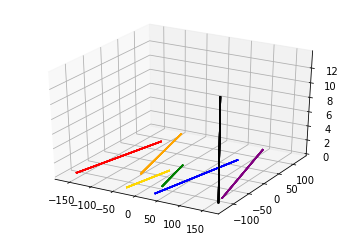

In [13]:
#2d rays (so flat initial line)
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.00,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(10,sourcepoints, sourcethet,origin10)
pl3dsurf = pl.figure().gca(projection = '3d')
vF = [] #final exit points
vI=[] # original source points
v7 = [] #intersection with E7
for i in range(len(Rays)):
    Ri = Rays[i]
    Ri[3][0]=0.00000
    Ri[3][1] = 0.00000
    Ri[3][2]=1
    vI.append(Ri[2])
    a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11 = TTTTioTEST(Ri,p1,p2,p3,p4)
    if a11 is not None:
        x,y,z = ML(a1[2],a1[3],200)
        x1,y1,z1 = ML(a3[2],a3[3],200)
        x2,y2,z2 = ML(a5[2],a5[3],100)
        x3,y3,z3 = ML(a6[2],a6[3],100)
        x4,y4,z4 = ML(a7[2],a7[3],200)
        x5,y5,z5 = ML(a9[2],a9[3],230)
        x6,y6,z6 = ML(a11[2],a11[3],20)
        pl3dsurf.plot(x,y,z, color = 'red')
        pl3dsurf.plot(x1,y1,z1, color = 'orange')
        pl3dsurf.plot(x2,y2,z2, color = 'gold')
        pl3dsurf.plot(x3,y3,z3, color = 'green')
        pl3dsurf.plot(x4,y4,z4, color = 'blue')
        pl3dsurf.plot(x5,y5,z5, color = 'purple')
        pl3dsurf.plot(x6,y6,z6, color = 'black')
        xp,yp,zp = PLINTzS(80,a11[2],a11[3])
        vi = [xp,yp,zp]
        vF.append(vi)
        v7.append(a11[2])
pl.show()

#2d rays (so flat initial line)
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.0001,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(100,sourcepoints, sourcethet,origin10)
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X1n,Y1n,Z1n, linewidth = .2, antialiased=True, color = 'grey',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X2n,Y2n,Z2n, linewidth = .2, antialiased=True, color = 'grey',alpha=0.7) #GLOBAL
vI=[] # original source points
v7 = [] #intersection with E7
for i in range(len(Rays)):
    Ri = Rays[i]
    Ri[3][0]=0.000001
    Ri[3][1] = 0.000001
    Ri[3][2]=1
    vI.append(Ri[2])
    a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11 = TTTTioTEST(Ri,p1,p2,p3,p4)
    if a11 is not None:
        x,y,z = ML(a1[2],a1[3],2)
        x1,y1,z1 = ML(a3[2],a3[3],2)
        x2,y2,z2 = ML(a5[2],a5[3],2)
        x3,y3,z3 = ML(a6[2],a6[3],100)
        x4,y4,z4 = ML(a7[2],a7[3],200)
        x5,y5,z5 = ML(a9[2],a9[3],230)
        x6,y6,z6 = ML(a11[2],a11[3],20)
        #pl3dsurf.plot(x,y,z, color = 'red')
        #pl3dsurf.plot(x1,y1,z1, color = 'orange')
        pl3dsurf.plot(x2,y2,z2, color = 'gold')
        #pl3dsurf.plot(x3,y3,z3, color = 'green')
        #pl3dsurf.plot(x4,y4,z4, color = 'blue')
        #pl3dsurf.plot(x5,y5,z5, color = 'purple')
        #pl3dsurf.plot(x6,y6,z6, color = 'black')
        #xp,yp,zp = PLINTzS(80,a11[2],a11[3])
        #vi = [xp,yp,zp]
        #vF.append(vi)
        #v7.append(a11[2])
pl.title('E3 intersection, source point, vertical')
pl.show()

TESTING JUST PLAIN INTERSECTION POINTS WITH WHAT IS EXPECTED TO SEE WHY THAT ISN'T PERFECT

In [14]:
coeffellipse7 = [164.54585247700001,99.690818975602866,130.9086635] #for ellipse 7
coeffellipse56 = [256.65344272795591,248.39387505453516,64.58693753]  #for ellipses 5&6&8&9

#coeffellipse56 = [257.48493853,249.252926,64.58693753]  #for ellipses 5&6&8&9
coeffellipse = [263.915180503,256.0,64.15] #for center ellipses

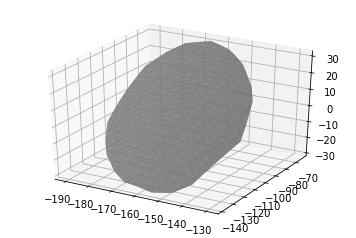

In [15]:
pl3dsurf = pl.figure().gca(projection = '3d')

pl3dsurf.plot_trisurf(X11,Y11,Z11,linewidth = .2, antialiased=True, color = 'grey',alpha=0.7)#GLOBAL
pl3dsurf.plot_trisurf(X12,Y12,Z12,linewidth = .2, antialiased=True, color = 'grey',alpha=0.7)#GLOBAL
pl.show()

In [6]:
#2d rays (so flat initial line)
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.0,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(1,sourcepoints, sourcethet,origin10)
#pl3dsurf = pl.figure().gca(projection = '3d')

vI=[] # original source points
v7 = [] #intersection with E7
vF = []
for i in range(len(Rays)):
    Ri = Rays[i]
    Ri[3][0]=0.0
    Ri[3][1] = 0.0
    Ri[3][2]=1.0
    vI.append(Ri[2])
    a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11 = TTTTioTEST(Ri,p1,p2,p3,p4)
    if a11 is not None:
        x,y,z = ML(a1[2],a1[3],2)
        x1,y1,z1 = ML(a3[2],a3[3],2)
        x2,y2,z2 = ML(a5[2],a5[3],2)
        x3,y3,z3 = ML(a6[2],a6[3],2)
        x4,y4,z4 = ML(a7[2],a7[3],2)
        x5,y5,z5 = ML(a9[2],a9[3],2)
        x6,y6,z6 = ML(a11[2],a11[3],2)
        #pl3dsurf.plot(x,y,z, color = 'red')
        #pl3dsurf.plot(x1,y1,z1, color = 'orange')
        #pl3dsurf.plot(x2,y2,z2, color = 'gold')
        #pl3dsurf.plot(x3,y3,z3, color = 'green')
        #pl3dsurf.plot(x4,y4,z4, color = 'blue')
        #pl3dsurf.plot(x5,y5,z5, color = 'purple')
        #pl3dsurf.plot(x6,y6,z6, color = 'black')
        #xp,yp,zp = PLINTzS(80,a11[2],a11[3])
        #vi = [xp,yp,zp]
        #vF.append(vi)
        #v7.append(a11[2])
        print('E10: ',a1[2][0],a1[2][1],a1[2][2])
        print('E8: ',a3[2][0],a3[2][1],a3[2][2])
        print('E3: ',a5[2][0],a5[2][1],a5[2][2])
        print('M: ',a6[2][0],a6[2][1],a6[2][2])
        print('E4: ',a7[2][0],a7[2][1],a7[2][2])
        print('E5: ',a9[2][0],a9[2][1],a9[2][2])
        print('E7: ',a11[2][0],a11[2][1],a11[2][2])
#pl.title('following_rays')
#pl.show()

E10:  -160.375 -113.0 -2.60275989206e-07
E8:  -96.2250000571 127.999999777 -5.5842229614e-07
E3:  -32.0749958593 -128.0 2.75433316536e-07
M:  2.12681040068e-06 0.0 4.16927804571e-07
E4:  32.0750001129 -128.0 5.58422292607e-07
E5:  96.2249957956 127.999999746 -2.75433315652e-07
E7:  160.37499603 -113.000000241 -5.27691845775e-07


So this seems to be working/what we expect. Where is the incorrect magnification coming from then?

Testing again with spread source BUT VERTICAL STILL

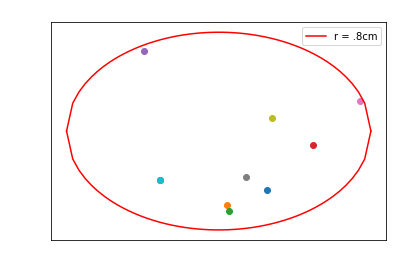

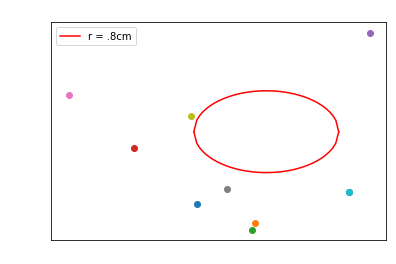

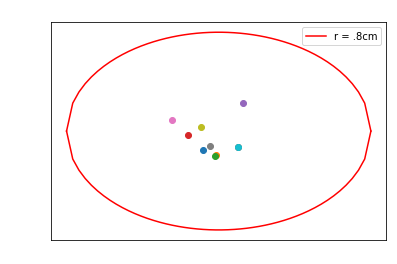

In [7]:
#2d rays (so flat initial line)
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.79375,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(10,sourcepoints, sourcethet,origin10)
#pl3dsurf = pl.figure().gca(projection = '3d')

vI=[] # original source points
v7 = [] #intersection with E7
vF = []
for i in range(len(Rays)):
    Ri = Rays[i]
    Ri[3][0]=0.0
    Ri[3][1] = 0.0
    Ri[3][2]=1.0
    vI.append(Ri[2])
    a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11 = TTTTioTEST(Ri,p1,p2,p3,p4)
    if a11 is not None:
        xp,yp,zp = PLINTzS(80,a11[2],a11[3])
        vi = [xp,yp,zp]
        vF.append(vi)
        v7.append(a11[2])
        
for i in range(len(vI)):
    pl.scatter(vI[i][0],vI[i][1])
pl.title('original source point', color = 'white')
x,yp,yn = circle([-160.375,-113],.8)
pl.plot(x,yp, color = 'red',label ='r = .8cm')
pl.plot(x,yn, color = 'red')
pl.tick_params(colors='white')
pl.legend()
pl.show()

for i in range(len(v7)):
    pl.scatter(v7[i][0],v7[i][1])
pl.title('Int with E7', color = 'white')
x,yp,yn = circle([160.375,-113],.8)
pl.plot(x,yp, color = 'red', label = 'r = .8cm')
pl.plot(x,yn, color = 'red')
pl.tick_params(colors='white')
pl.legend()
pl.show()

for i in range(len(vF)):
    pl.scatter(vF[i][0],vF[i][1])
pl.title('Int at z = 80', color = 'white')
x,yp,yn = circle([160.375,-113],.8)
pl.plot(x,yp, color = 'red')
pl.plot(x,yn, color = 'red',label = 'r = .8cm')
pl.tick_params(colors='white')
pl.legend()
pl.show()

#SO IT'S WORKING THE WAY IT'S SUPPOSED TO?
#this is VERTICAL rays, dispersed source points

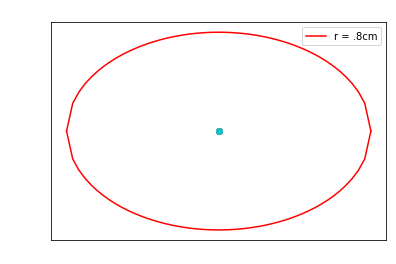

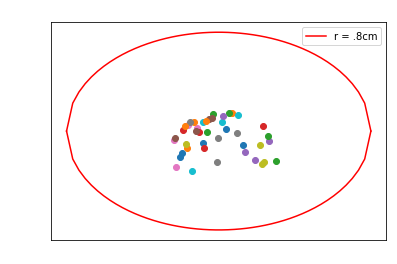

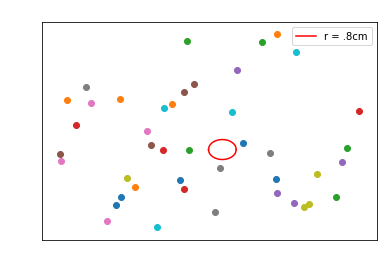

In [9]:
#2d rays (so flat initial line)
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.0,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(100,sourcepoints, sourcethet,origin10)
#pl3dsurf = pl.figure().gca(projection = '3d')

vI=[] # original source points
v7 = [] #intersection with E7
vF = []
for i in range(len(Rays)):
    Ri = Rays[i]
    #Ri[3][0]=0.0
    #Ri[3][1] = 0.0
    #Ri[3][2]=1.0
    vI.append(Ri[2])
    a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11 = TTTTioTEST(Ri,p1,p2,p3,p4)
    if a11 is not None:
        xp,yp,zp = PLINTzS(80,a11[2],a11[3])
        vi = [xp,yp,zp]
        vF.append(vi)
        v7.append(a11[2])
        
for i in range(len(vI)):
    pl.scatter(vI[i][0],vI[i][1])
pl.title('original source point', color = 'white')
x,yp,yn = circle([-160.375,-113],.8)
pl.plot(x,yp, color = 'red',label ='r = .8cm')
pl.plot(x,yn, color = 'red')
pl.tick_params(colors='white')
pl.legend()
pl.show()

for i in range(len(v7)):
    pl.scatter(v7[i][0],v7[i][1])
pl.title('Int with E7', color = 'white')
x,yp,yn = circle([160.375,-113],.8)
pl.plot(x,yp, color = 'red', label = 'r = .8cm')
pl.plot(x,yn, color = 'red')
pl.tick_params(colors='white')
pl.legend()
pl.show()

for i in range(len(vF)):
    pl.scatter(vF[i][0],vF[i][1])
pl.title('Int at z = 80', color = 'white')
x,yp,yn = circle([160.375,-113],.8)
pl.plot(x,yp, color = 'red')
pl.plot(x,yn, color = 'red',label = 'r = .8cm')
pl.tick_params(colors='white')
pl.legend()
pl.show()

#SO IT'S WORKING THE WAY IT'S SUPPOSED TO?
#this is VERTICAL rays, dispersed source points

Now with not all rays vertical. So Ri[3] != [0,0,1]

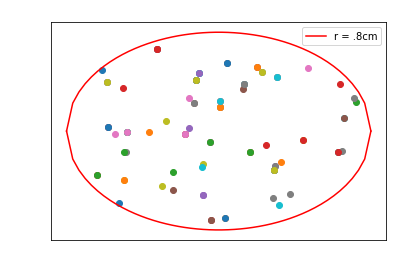

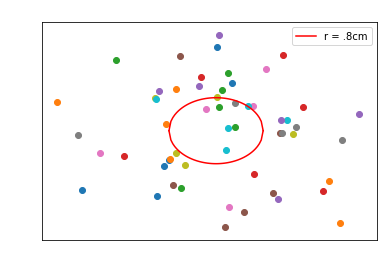

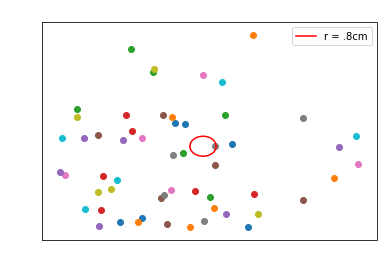

In [12]:
#2d rays (so flat initial line)
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.79375,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(100,sourcepoints, sourcethet,origin10)
#pl3dsurf = pl.figure().gca(projection = '3d')

vI=[] # original source points
v7 = [] #intersection with E7
vF = []
for i in range(len(Rays)):
    Ri = Rays[i]
    vI.append(Ri[2])
    a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11 = TTTTioTEST(Ri,p1,p2,p3,p4)
    if a11 is not None:
        xp,yp,zp = PLINTzS(80,a11[2],a11[3])
        vi = [xp,yp,zp]
        vF.append(vi)
        v7.append(a11[2])
for i in range(len(vI)):
    pl.scatter(vI[i][0],vI[i][1])
pl.title('original source point', color = 'white')
x,yp,yn = circle([-160.375,-113],.8)
pl.plot(x,yp, color = 'red',label ='r = .8cm')
pl.plot(x,yn, color = 'red')
pl.tick_params(colors='white')
pl.legend()
pl.show()

for i in range(len(v7)):
    pl.scatter(v7[i][0],v7[i][1])
pl.title('Int with E7', color = 'white')
x,yp,yn = circle([160.375,-113],.8)
pl.plot(x,yp, color = 'red', label = 'r = .8cm')
pl.plot(x,yn, color = 'red')
pl.tick_params(colors='white')
pl.legend()
pl.show()

for i in range(len(vF)):
    pl.scatter(vF[i][0],vF[i][1])
pl.title('Int at z = 80', color = 'white')
x,yp,yn = circle([160.375,-113],.8)
pl.plot(x,yp, color = 'red')
pl.plot(x,yn, color = 'red',label = 'r = .8cm')
pl.tick_params(colors='white')
pl.legend()
pl.show()
#SO IT'S WORKING THE WAY IT'S SUPPOSED TO?
#this is when the Z component of the ray's VECTOR is zero.

From above, do a percentage test to see what percentage actually fall within the circle, versus NOT.

In [18]:
#2d rays (so flat initial line)
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.79375,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(1000,sourcepoints, sourcethet,origin10)
#pl3dsurf = pl.figure().gca(projection = '3d')

vI=[] # original source points
v7 = [] #intersection with E7
countTot = 0
countHit = 0
for i in range(len(Rays)):
    Ri = Rays[i]
    vI.append(Ri[2])
    a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11 = TTTTioTEST(Ri,p1,p2,p3,p4)
    if a11 is not None:
        xp,yp,zp = PLINTzS(80,a11[2],a11[3])
        vi = [xp,yp,zp]
        vF.append(vi)
        v7.append(a11[2])
        countTot = countTot+1
        if (xp-160.375)**2 + (yp+113)**2 <= .64:
            countHit = countHit+1
print('for SPECULAR:','Total:', countTot, 'Hit: ', countHit)

for SPECULAR: Total: 473 Hit:  4


now testing the actual specular source being used because what. 
Also test the ones that get REJECTED IF THEY DON'T HIT WITHIN RANGE

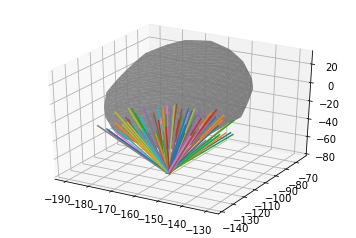

In [21]:
#2d rays (so flat initial line)
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.79375,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(100,sourcepoints, sourcethet,origin10)
pl3dsurf = pl.figure().gca(projection = '3d')

pl3dsurf.plot_trisurf(X11,Y11,Z11,linewidth = .2, antialiased=True, color = 'grey',alpha=0.7)#GLOBAL
pl3dsurf.plot_trisurf(X12,Y12,Z12,linewidth = .2, antialiased=True, color = 'grey',alpha=0.7)#GLOBAL

#THESE ARE POINTS, NOT VECTORS!
vI=[] # original source points
v7 = [] #intersection with E7
vF = []
for i in range(len(Rays)):
    Ri = Rays[i]
    sX,sY,sZ = ML(Ri[2],Ri[3],80)
    pl3dsurf.plot(sX,sY,sZ)
pl.show()
    

for SPECULAR: Total: 52 Hit:  1


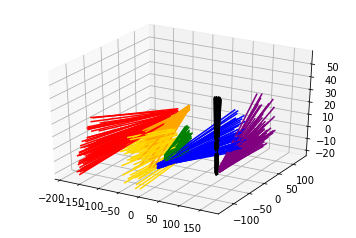

In [26]:
#2d rays (so flat initial line)
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.79375,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(100,sourcepoints, sourcethet,origin10)
pl3dsurf = pl.figure().gca(projection = '3d')
vF = [] #final exit points
vI=[] # original source points
v7 = [] #intersection with E7
countTot = 0
countHit = 0
for i in range(len(Rays)):
    Ri = Rays[i]
    vI.append(Ri[2])
    a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11 = TTTTioTEST(Ri,p1,p2,p3,p4)
    if a11 is not None:
        x,y,z = ML(a1[2],a1[3],200)
        x1,y1,z1 = ML(a3[2],a3[3],200)
        x2,y2,z2 = ML(a5[2],a5[3],100)
        x3,y3,z3 = ML(a6[2],a6[3],100)
        x4,y4,z4 = ML(a7[2],a7[3],200)
        x5,y5,z5 = ML(a9[2],a9[3],230)
        x6,y6,z6 = ML(a11[2],a11[3],80)
        pl3dsurf.plot(x,y,z, color = 'red')
        pl3dsurf.plot(x1,y1,z1, color = 'orange')
        pl3dsurf.plot(x2,y2,z2, color = 'gold')
        pl3dsurf.plot(x3,y3,z3, color = 'green')
        pl3dsurf.plot(x4,y4,z4, color = 'blue')
        pl3dsurf.plot(x5,y5,z5, color = 'purple')
        pl3dsurf.plot(x6,y6,z6, color = 'black')
        xp,yp,zp = PLINTzS(80,a11[2],a11[3])
        vi = [xp,yp,zp]
        vF.append(vi)
        v7.append(a11[2])
        countTot = countTot+1
        if (xp-160.375)**2 + (yp+113)**2 <= .64:
            countHit = countHit+1
print('for SPECULAR:','Total:', countTot, 'Hit: ', countHit)
pl.show()

#VERY low percentage.. ask steve? AND MOVE ON

SO THE ABOVE STILL DOES NOT RELALY MEET THE REASONABLE PERCENTAGE (AROUND 1-2% HIT RATE?). 
Ask steve. It does work for VERTICAL so the only ifference is the ANGLE... 
move on to DETECTING.